In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data = pd.read_csv('dispositions_and_opex_and_transmission.csv')

In [4]:
data

,Unnamed: 0,disposition_of_energy,energy_losses,internal_use_energy,megawatt_hours_sold_sales_to_ultimate_consumers,utility_id_ferc1,report_year,load_dispatching,administrative_and_general_expenses,administrative_and_general_operation_expense,...,transmission_line_length_miles,transmission_line_and_structures_length_miles,num_transmission_circuits,capex_land,capex_other,capex_total,opex_operations,opex_maintenance,opex_rents,opex_total
0,0,1314810.0,51561.0,5274.0,1257975.0,2,1994,440467.0,9930284.0,9666993.0,...,94.28,0.00,42.0,2381682.0,13596116.0,15977798.0,263672.0,0.0,0.0,263672.0
1,1,1325209.0,3620.0,5501.0,1316088.0,2,1995,433738.0,8626037.0,8426534.0,...,94.28,0.00,42.0,2381682.0,13598142.0,15979824.0,356224.0,0.0,0.0,356224.0
2,2,1303131.0,41748.0,4405.0,1256978.0,2,1996,393147.0,8802538.0,8637842.0,...,94.28,0.00,42.0,2518824.0,15567100.0,18085924.0,18498.0,542438.0,0.0,560936.0
3,3,1322127.0,29372.0,3639.0,1289116.0,2,1997,423658.0,9241069.0,9073275.0,...,94.28,0.00,42.0,5004770.0,13768888.0,18773658.0,27620.0,252552.0,0.0,280172.0
4,4,1346884.0,52603.0,3410.0,1290871.0,2,1998,501284.0,9518025.0,9294857.0,...,94.28,0.00,42.0,5004770.0,13768888.0,18773658.0,60982.0,93952.0,0.0,154934.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5921,5921,NaN,NaN,NaN,NaN,442,2001,340.0,12159331.0,12159212.0,...,3496.28,1332.38,158.0,81910.0,608284.0,690194.0,779196.0,2120150.0,0.0,2899346.0
5922,5922,NaN,NaN,NaN,NaN,442,2002,NaN,20435604.0,20430636.0,...,3552.84,1305.02,158.0,80858.0,638248.0,719106.0,141974.0,5220288.0,0.0,5362262.0
5923,5923,NaN,NaN,NaN,NaN,442,2003,NaN,3914779.0,3912530.0,...,4025.02,1305.00,148.0,80156.0,635800.0,715956.0,16314.0,314754.0,0.0,331068.0
5924,5924,NaN,NaN,NaN,NaN,443,2021,NaN,1804985.0,1804985.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
capex_total = data.groupby('report_year')['capex_total'].agg('sum')
opex_total = data.groupby('report_year')['opex_total'].agg('sum')
megawatt_hours_sold_sales_to_ultimate_consumers = data.groupby('report_year')['megawatt_hours_sold_sales_to_ultimate_consumers'].agg('sum')
transmission_line_length_miles = data.groupby('report_year')['transmission_line_length_miles'].agg('sum')

transmission_expenses = data.groupby('report_year')['transmission_expenses'].agg('sum')
distribution_expenses = data.groupby('report_year')['distribution_expenses'].agg('sum')

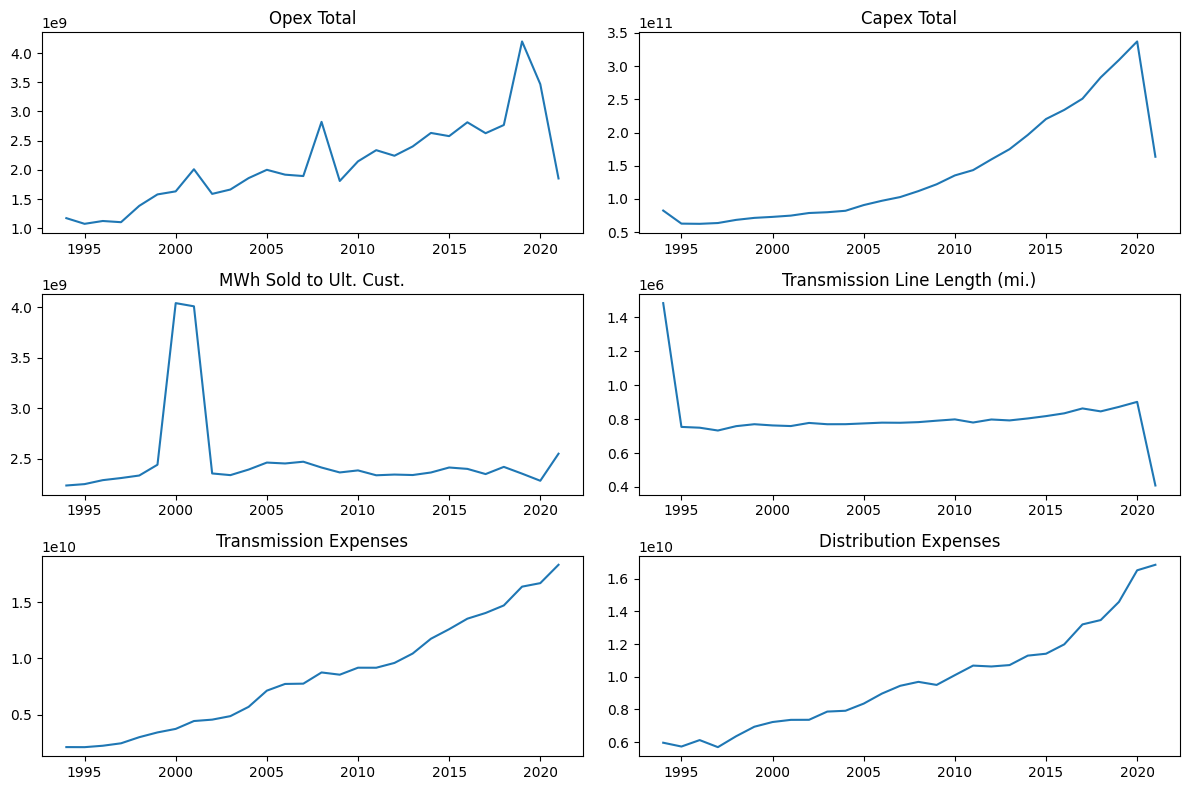

In [20]:
fig,axs = plt.subplots(nrows=3,ncols=2,figsize=(12,8))
axs[0, 0].plot(opex_total)
axs[0, 0].set_title("Opex Total")
axs[0, 1].plot(capex_total)
axs[0, 1].set_title("Capex Total")
axs[1, 0].plot(megawatt_hours_sold_sales_to_ultimate_consumers)
axs[1, 0].set_title("MWh Sold to Ult. Cust.")
axs[1, 1].plot(transmission_line_length_miles)
axs[1, 1].set_title("Transmission Line Length (mi.)")
axs[2, 0].plot(transmission_expenses)
axs[2, 0].set_title("Transmission Expenses")
axs[2, 1].plot(distribution_expenses)
axs[2, 1].set_title("Distribution Expenses")
fig.tight_layout()
plt.show()
fig.savefig('initial graphs.png',bbox_inches='tight',dpi=600)